# Proyecto Machine Learning  - The Bridge - Joaquín Villar 🚀

# Análisis de Préstamos - Declaración del Problema 📊
---------
## Introducción 📑
Las empresas del sector financiero especializadas en préstamos ofrecen diversas soluciones de financiamiento a sus clientes. Estas compañías enfrentan un desafío clave: evaluar la solvencia de los solicitantes para minimizar el riesgo de impago.

Este caso de estudio proporcionará una visión sobre cómo se abordan problemas empresariales reales mediante Análisis Exploratorio de Datos (EDA) y Machine Learning. Además, permitirá desarrollar una comprensión básica de la analítica de riesgos en el sector bancario y financiero, y cómo los datos pueden utilizarse para reducir las pérdidas en la concesión de préstamos.

-----------
## Entendimiento del Negocio 📝
Trabajas en una empresa de préstamos que debe decidir si aprueba o no una solicitud en función del perfil del solicitante. Esta decisión implica dos riesgos principales:
- Pérdida de negocio: Si el solicitante tiene capacidad para pagar el préstamo, pero su solicitud es rechazada, la empresa pierde una oportunidad de generar ingresos.
- Pérdida financiera: Si el solicitante no tiene capacidad para pagar y se aprueba el préstamo, la empresa sufre una pérdida económica.

El conjunto de datos proporcionado contiene información sobre solicitantes de préstamos anteriores y si incumplieron o no con sus pagos. El objetivo es identificar patrones que indiquen la probabilidad de que una persona no pague su préstamo. Esta información permitirá tomar decisiones como:
- Negar la solicitud de préstamo.
- Reducir el monto del préstamo.
- Ofrecer el préstamo con una tasa de interés más alta a solicitantes de alto riesgo.

## Tipos de decisiones al evaluar una solicitud de préstamo 💰
1. Préstamo aprobado: Si la empresa aprueba la solicitud, pueden darse tres escenarios:
- Totalmente pagado: El solicitante ha cumplido con el pago total del préstamo (capital e intereses).
- En proceso de pago: El solicitante sigue pagando sus cuotas, pero aún no ha completado el período del préstamo. Estos clientes no se consideran incumplidores.
- Incumplimiento (Charged-off): El solicitante no ha realizado los pagos en el tiempo estipulado durante un período prolongado, lo que indica un incumplimiento del préstamo.

2. Préstamo rechazado: Si la empresa decide no otorgar el préstamo, no existe historial de transacciones para estos solicitantes, por lo que estos datos no están disponibles en el conjunto de datos.
----------------
## Objetivos del Negocio 🎯
Las empresas del sector financiero buscan facilitar préstamos personales, comerciales y financiamiento para diversos fines a través de plataformas ágiles y digitales. Sin embargo, como en cualquier empresa de préstamos, otorgar créditos a solicitantes de alto riesgo es una de las principales fuentes de pérdidas financieras, conocidas como pérdidas crediticias.

Estas pérdidas ocurren cuando un prestatario no paga su deuda, generando un impacto negativo en la empresa. En este caso, los clientes etiquetados como "charged-off" representan a los incumplidores que generan la mayor cantidad de pérdidas.

El objetivo principal del análisis es identificar a los clientes de alto riesgo para reducir la cantidad de préstamos otorgados a estos perfiles y minimizar las pérdidas crediticias. Esto se logrará utilizando técnicas de Análisis Exploratorio de Datos (EDA) y Machine Learning.

En otras palabras, la empresa busca comprender los factores que impulsan el incumplimiento de pagos, es decir, las variables clave que predicen si un solicitante es propenso a no pagar su préstamo. Este conocimiento se utilizará para mejorar la evaluación de riesgos y la gestión de la cartera de préstamos.·

--------------

# 1. Carga de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bt

In [2]:
data = pd.read_csv("data/lending_club_loan_two.csv")

In [3]:
df = data.copy()

In [4]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Descripción de las Columnas del Dataset
| #  | Columna                  | Descripción                                                                                                                                 | Tipo        |
|----|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| 0  | `loan_amnt`              | El monto del préstamo solicitado por el cliente. Si el monto del préstamo es reducido por el departamento de crédito, se reflejará aquí.   | numérico    |
| 1  | `term`                   | El número de pagos del préstamo. Los valores son en meses y pueden ser 36 o 60.                                                               | numérico    |
| 2  | `int_rate`               | Tasa de interés del préstamo.                                                                                                                 | numérico    |
| 3  | `installment`            | El pago mensual que debe realizar el cliente si el préstamo se origina.                                                                  | numérico    |
| 4  | `grade`                  | Grado asignado al préstamo por la entidad.                                                                                                           | texto       |
| 5  | `sub_grade`              | Subgrado asignado al préstamo por la entidad.                                                                                                        | texto       |
| 6  | `emp_title`              | El título del trabajo proporcionado por el cliente al solicitar el préstamo.                                                             | texto       |
| 7  | `emp_length`             | La duración del empleo en años. Los valores posibles van de 0 a 10, donde 0 significa menos de un año y 10 significa diez o más años.         | numérico    |
| 8  | `home_ownership`         | El estado de propiedad de la vivienda proporcionado por el cliente.                      | texto       |
| 9  | `annual_inc`             | El ingreso anual proporcionado por el cliente.                                                              | numérico    |
| 10 | `verification_status`    | Indica si el ingreso fue verificado por la entidad, no verificado, o si la fuente de ingreso fue verificada.                                          | texto       |
| 11 | `issue_d`                | El mes en el que se financió el préstamo.                                                                                                     | fecha       |
| 12 | `loan_status`            | El estado actual del préstamo. (0: Charged Off, 1: Fully Paid)                                                                                                                | texto       |
| 13 | `purpose`                | Una categoría proporcionada por el cliente para la solicitud del préstamo.                                                                | texto       |
| 14 | `title`                  | El título del préstamo proporcionado por el cliente.                                                                                     | texto       |
| 15 | `zip_code`               | Los primeros 3 números del código postal proporcionado por el cliente en la solicitud del préstamo.                                       | texto       |
| 16 | `addr_state`             | El estado proporcionado por el cliente en la solicitud del préstamo.                                                                     | texto       |
| 17 | `dti`                    | Una proporción calculada usando los pagos mensuales totales de deuda sobre las obligaciones totales de deuda, excluyendo el préstamo.       | numérico    |
| 18 | `earliest_cr_line`       | El mes en que se abrió la línea de crédito más antigua reportada del cliente.                                                              | fecha       |
| 19 | `open_acc`               | El número de líneas de crédito abiertas por el cliente.                                                             | numérico    |
| 20 | `pub_rec`                | Número de registros públicos negativos.                                                                                                       | numérico    |
| 21 | `revol_bal`              | El saldo total del crédito resuelto.                                                                                                         | numérico    |
| 22 | `revol_util`             | La tasa de utilización de la línea del crédito resuelto, es decir, la cantidad de crédito que el cliente está utilizando en relación con el crédito disponible. | numérico    |
| 23 | `total_acc`              | El número total de líneas de crédito actualmente en el archivo de créditos del cliente.                                                    | numérico    |
| 24 | `initial_list_status`    | El estado inicial de listado del préstamo. Los valores posibles son: W, F.                                                                    | texto       |
| 25 | `application_type`       | Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.                                           | texto       |
| 26 | `mort_acc`               | Número de cuentas hipotecarias.                                                                                                               | numérico    |
| 27 | `pub_rec_bankruptcies`   | Número de quiebras en registros públicos.                                                                                                     | numérico    |
| 28 | `address`                | Dirección proporcionada por el cliente en la solicitud del préstamo.                                                                     | texto       |


# 2. Problema de Machine Learning: Clasificación
Buscamos predecir el estado del préstamo, que corresponde a la columna "loan_status" (0: préstamo incobrable , 1: préstamo pagado o en proceso de pago). Se trata de un problema de **Clasificación Binaria**.

# 3. División en Train y Test

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1) 
y = df['loan_status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Análisis de la Distribución del Target

In [7]:
target = "loan_status"

In [8]:
df[target].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

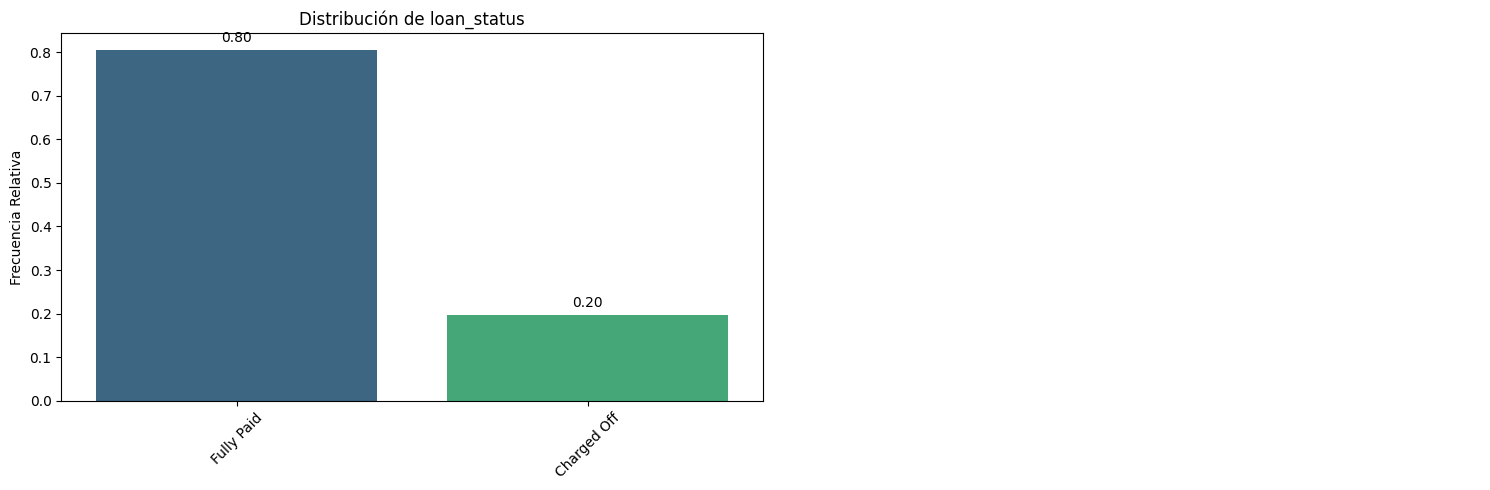

In [9]:
bt.pinta_distribucion_categoricas(df, [target], relativa=True, mostrar_valores= True)

Target desbalanceado, aplicaremos técnica oversampling sobre la clase minoritaria.

# 5. Comprensión de Variables

In [10]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

## Limpieza y transformación

In [11]:
df["term_months"] = df["term"].str.replace("months", "").astype(int)
df = df.drop(columns=["term"])
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y")

In [12]:
df["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

# 6. Feature Reducción Preliminar

In [13]:
loan_status_binario = {'Fully Paid': 1, 'Charged Off': 0} # Convertir columna objetivo en binaria
df[target] = df[target].map(loan_status_binario)

In [14]:
numeric_cols = df.select_dtypes(include=["int64" , "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   int_rate              396030 non-null  float64       
 2   installment           396030 non-null  float64       
 3   grade                 396030 non-null  object        
 4   sub_grade             396030 non-null  object        
 5   emp_title             373103 non-null  object        
 6   emp_length            377729 non-null  object        
 7   home_ownership        396030 non-null  object        
 8   annual_inc            396030 non-null  float64       
 9   verification_status   396030 non-null  object        
 10  issue_d               396030 non-null  datetime64[ns]
 11  loan_status           396030 non-null  int64         
 12  purpose               396030 non-null  object        
 13 

In [16]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

loan_status             1.000000
int_rate                0.247758
revol_util              0.082373
mort_acc                0.073111
dti                     0.062413
loan_amnt               0.059836
annual_inc              0.053432
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
total_acc               0.017893
revol_bal               0.010892
pub_rec_bankruptcies    0.009383
Name: loan_status, dtype: float64

In [17]:
good_corr_feat = corr[corr > 0.05].index.values # Guardar columnas con correlación > 0.05

In [18]:
bad_corr_feat = corr[corr < 0.05].index.values # Eliminar variables con correlación < 0.05
df.drop(columns=bad_corr_feat, inplace=True)

In [19]:
# plt.figure(figsize=(10,10))
# sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
#             vmin=-1,
#             vmax=1,
#             annot=True,
#             cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
#             square=True,
#             linewidths=.5);

# 7. Análisis Univariante

In [20]:
df["annual_income_cat"] = pd.cut(df["annual_inc"],
                          bins=[0, 45000, 64000, 90000, 200000, np.inf],
                          labels=[1, 2, 3, 4, 5])

In [21]:
# bins = [0, 30000, 50000, 70000, 90000, 110000, 150000, np.inf]
# df["annual_income_cat"] = pd.cut(df["annual_inc"], bins=bins, labels=range(1, 8))

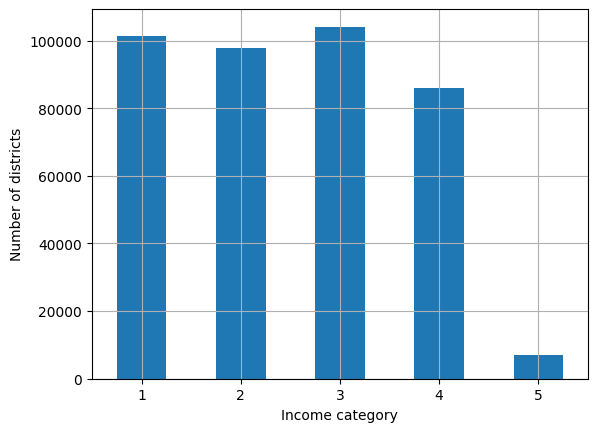

In [22]:
df["annual_income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [23]:
df = df.drop(columns=["annual_inc"])

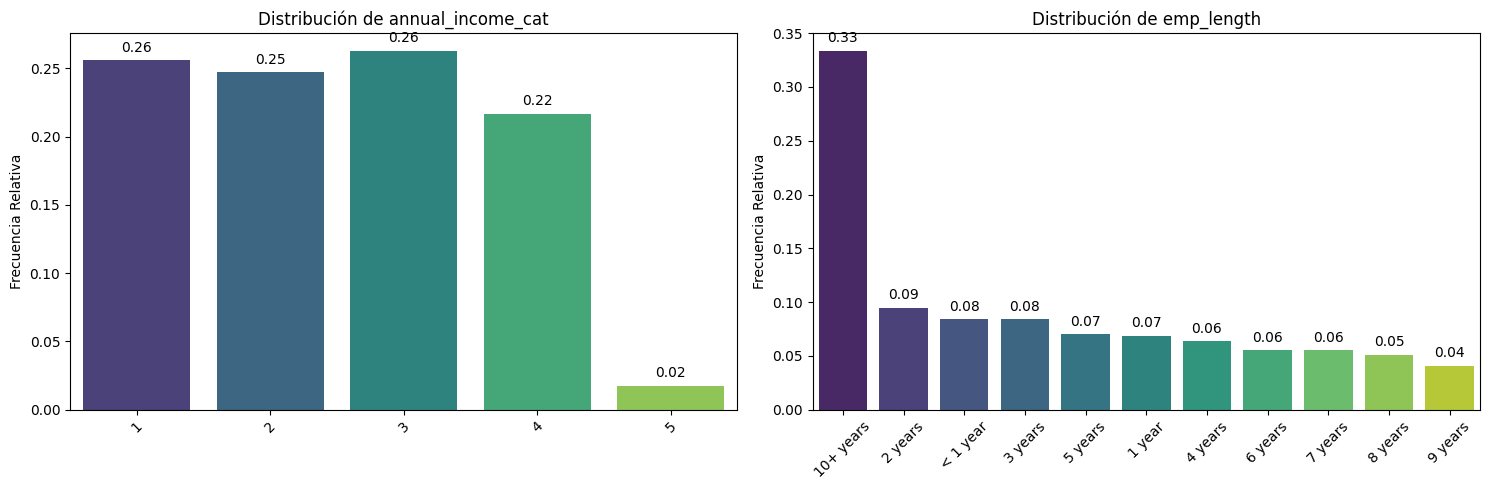

In [24]:
bt.pinta_distribucion_categoricas(df, ["annual_income_cat", "emp_length"], relativa= True, mostrar_valores= True)

In [25]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

In [26]:
df[features_num].hist()

KeyError: "['annual_inc'] not in index"

In [ ]:
df[features_num].describe()

# 8. Análisis Bivariante

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [ ]:
df["term_months"] = df["term"].str.replace("months", "").astype(int)
df = df.drop(columns=["term"])
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y")

In [ ]:
df.head(5)

In [ ]:
bt.plot_categorical_numerical_relationship(df, categorical_col= "annual_income_cat", numerical_col="loan_amnt")